In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
import xgboost
import pickle as pkl
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read the dataset
train = pd.read_csv("/content/panic_disorder_dataset_training.csv")
train.head()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0.0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0.0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0.0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0.0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0.0


In [4]:
test = pd.read_csv("/content/panic_disorder_dataset_testing.csv")
test.head()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,41,Male,Yes,No,High,Shortness of breath,Mild,Mild,Urban,Diabetes,Bipolar disorder,Alcohol,Seeking therapy,Low,Exercise,0
1,2,20,Female,Yes,No,Low,Shortness of breath,Mild,Significant,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Diet,0
2,3,32,Male,Yes,Yes,High,Panic attacks,Severe,Mild,Rural,Heart disease,Bipolar disorder,Drugs,Meditation,Moderate,Exercise,0
3,4,41,Female,Yes,Yes,Moderate,Shortness of breath,Moderate,Significant,Urban,Heart disease,Anxiety disorder,NaN,Exercise,High,Sleep quality,0
4,5,36,Female,Yes,No,High,Chest pain,Severe,Significant,Rural,Asthma,Depressive disorder,NaN,Seeking therapy,Low,Exercise,0


In [5]:
#Handling the missing values
print('Train data shape:', train.shape)
print('Test data shape:',test.shape)

Train data shape: (33525, 17)
Test data shape: (20000, 17)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33525 entries, 0 to 33524
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Participant ID            33525 non-null  int64  
 1   Age                       33525 non-null  int64  
 2   Gender                    33525 non-null  object 
 3   Family History            33525 non-null  object 
 4   Personal History          33525 non-null  object 
 5   Current Stressors         33525 non-null  object 
 6   Symptoms                  33525 non-null  object 
 7   Severity                  33525 non-null  object 
 8   Impact on Life            33525 non-null  object 
 9   Demographics              33525 non-null  object 
 10  Medical History           24962 non-null  object 
 11  Psychiatric History       25188 non-null  object 
 12  Substance Use             22426 non-null  object 
 13  Coping Mechanisms         33524 non-null  object 
 14  Social

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Participant ID            20000 non-null  int64 
 1   Age                       20000 non-null  int64 
 2   Gender                    20000 non-null  object
 3   Family History            20000 non-null  object
 4   Personal History          20000 non-null  object
 5   Current Stressors         20000 non-null  object
 6   Symptoms                  20000 non-null  object
 7   Severity                  20000 non-null  object
 8   Impact on Life            20000 non-null  object
 9   Demographics              20000 non-null  object
 10  Medical History           14999 non-null  object
 11  Psychiatric History       15011 non-null  object
 12  Substance Use             13383 non-null  object
 13  Coping Mechanisms         20000 non-null  object
 14  Social Support        

In [8]:
#removing the null values
train.dropna(inplace=True)

In [9]:
train.isnull().sum()

Participant ID              0
Age                         0
Gender                      0
Family History              0
Personal History            0
Current Stressors           0
Symptoms                    0
Severity                    0
Impact on Life              0
Demographics                0
Medical History             0
Psychiatric History         0
Substance Use               0
Coping Mechanisms           0
Social Support              0
Lifestyle Factors           0
Panic Disorder Diagnosis    0
dtype: int64

In [10]:
#removing null values
test.dropna(inplace=True)

In [11]:
test.isnull().sum()

Participant ID              0
Age                         0
Gender                      0
Family History              0
Personal History            0
Current Stressors           0
Symptoms                    0
Severity                    0
Impact on Life              0
Demographics                0
Medical History             0
Psychiatric History         0
Substance Use               0
Coping Mechanisms           0
Social Support              0
Lifestyle Factors           0
Panic Disorder Diagnosis    0
dtype: int64

In [12]:
#categorical columns
cat_cols = []
for i in train.columns:
     if train[i].dtype=='object':
         cat_cols.append(i)
cat_cols

['Gender',
 'Family History',
 'Personal History',
 'Current Stressors',
 'Symptoms',
 'Severity',
 'Impact on Life',
 'Demographics',
 'Medical History',
 'Psychiatric History',
 'Substance Use',
 'Coping Mechanisms',
 'Social Support',
 'Lifestyle Factors']

In [13]:
#handling categorial columns
le = {}
for column in train.columns:
    if train[column].dtype == object:
        le[column]={}
        c=0
        for i in train[column].unique():
            le[column][i]=c
            c+=1
        train[column]=train [column].map(le[column])
le = {}
for column in test.columns:
    if test[column].dtype == object:
        le[column]={}
        c=0
        for i in test[column].unique():
            le[column][i]=c
            c+=1
        test[column]=test[column].map(le[column])

In [14]:
#under sampling the data
from sklearn.model_selection import train_test_split
from collections import Counter

# Extract the target variable before splitting
y = train['Panic Disorder Diagnosis']  # Assuming this is the correct column name
x = train.drop('Panic Disorder Diagnosis', axis=1)

x_train, _, y_train, _ = train_test_split(x, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

indices = np.random.choice(x_train[y_train == 0].index, size=x_train[y_train == 1].shape[0], replace=False)
temp_x = x_train[y_train == 0].loc[indices]
temp_x = pd.concat([temp_x, x_train[y_train == 1]]) # Use pd.concat to combine DataFrames
temp_y = y_train[y_train == 0].loc[indices]
temp_y = pd.concat([temp_y, y_train[y_train == 1]]) # Use pd.concat to combine Series
print(x_train.shape, y_train.shape)
print("Before balancing", Counter(y_train))
print(temp_x.shape, temp_y.shape)
print("After balancing", Counter(temp_y))

(10038, 16) (10038,)
Before balancing Counter({0.0: 9500, 1.0: 538})
(1076, 16) (1076,)
After balancing Counter({0.0: 538, 1.0: 538})


In [15]:
#Calculating Fscore and p value
f_p_values=chi2(temp_x,temp_y)
f_p_values

(array([7.03653059e+01, 2.55272218e+00, 1.62162162e-02, 1.21104000e+01,
        1.37068146e+01, 1.10250000e+02, 6.56484459e+01, 3.38983051e-02,
        4.56682135e+01, 9.22787194e-02, 3.99818676e-01, 2.34862385e-01,
        4.68864469e-01, 6.06575186e+00, 1.09865471e+00, 6.00000000e+02]),
 array([4.92790171e-017, 1.10104401e-001, 8.98669001e-001, 5.01413783e-004,
        2.13677742e-004, 8.63801264e-026, 5.38974596e-016, 8.53923299e-001,
        1.40077521e-011, 7.61299981e-001, 5.27182915e-001, 6.27941648e-001,
        4.93510030e-001, 1.37828068e-002, 2.94561529e-001, 1.67416798e-132]))

In [16]:
#p Values
p_values=pd.Series(f_p_values[1])
p_values.index=x_train.columns
p_values.sort_index(ascending=True)

Age                     1.101044e-01
Coping Mechanisms       1.378281e-02
Current Stressors       8.638013e-26
Demographics            7.613000e-01
Family History          5.014138e-04
Gender                  8.986690e-01
Impact on Life          1.400775e-11
Lifestyle Factors      1.674168e-132
Medical History         5.271829e-01
Participant ID          4.927902e-17
Personal History        2.136777e-04
Psychiatric History     6.279416e-01
Severity                8.539233e-01
Social Support          2.945615e-01
Substance Use           4.935100e-01
Symptoms                5.389746e-16
dtype: float64

In [17]:
#feature selection
fts = ["Coping Mechanisms", "Current Stressors", "Demographics", "Family History", "Gender", "Impact on Life", "Symptoms"]
temp_x[fts]

,Coping Mechanisms,Current Stressors,Demographics,Family History,Gender,Impact on Life,Symptoms
30532,0,1,0,0,1,0,2
31602,2,1,1,1,0,2,4
30002,3,0,0,0,1,1,3
10496,2,0,0,1,1,1,0
29170,2,2,1,1,0,1,3
...,...,...,...,...,...,...,...
21158,1,1,0,0,0,2,0
17123,1,0,0,1,0,1,1
20255,2,0,0,1,0,2,0
2040,1,0,0,1,1,2,1


In [18]:
#Descriptive Analysis
train.describe(include='all')

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
count,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000
mean,16749.742110,41.574514,0.505658,0.496493,0.499362,1.005658,2.001674,1.000956,0.997529,0.495378,0.995617,0.999123,0.493545,1.494900,1.000877,0.997609,0.054192
std,9703.712908,13.730400,0.499988,0.500008,0.500020,0.816786,1.422949,0.817147,0.816119,0.499999,0.817574,0.814753,0.499978,1.126801,0.818365,0.818995,0.226405
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8381.750000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16677.500000,42.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000
75%,25224.250000,53.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,0.000000
max,33524.000000,65.000000,1.000000,1.000000,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000


<Axes: xlabel='Panic Disorder Diagnosis', ylabel='count'>

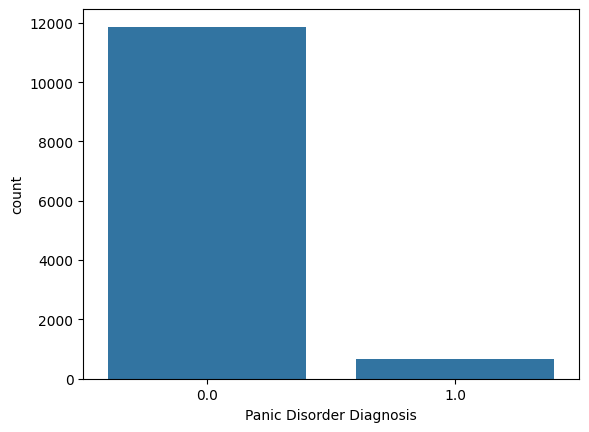

In [19]:
#univariate Analysis
import seaborn as sns
# Assuming 'train' is your dataframe as per input 15
sns.barplot(train['Panic Disorder Diagnosis'].value_counts())

<Axes: xlabel='Panic Disorder Diagnosis', ylabel='count'>

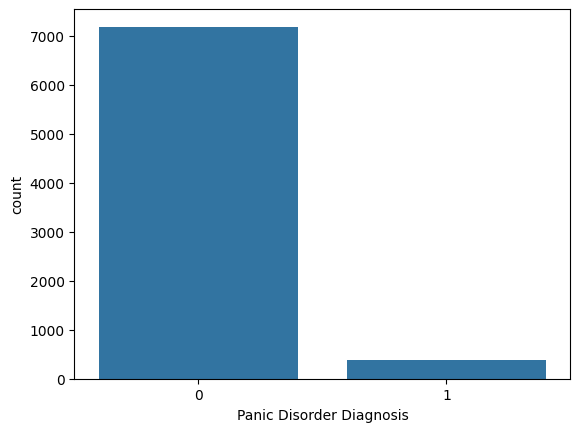

In [20]:
import seaborn as sns
# Assuming 'train' is your dataframe as per input 15
sns.barplot(test['Panic Disorder Diagnosis'].value_counts())

In [21]:
import pandas as pd

# Assuming df is your DataFrame with the relevant columns
df = pd.read_csv('/content/panic_disorder_dataset_testing.csv')# Adjust this according to your data file type and location

<Axes: ylabel='Lifestyle Factors'>

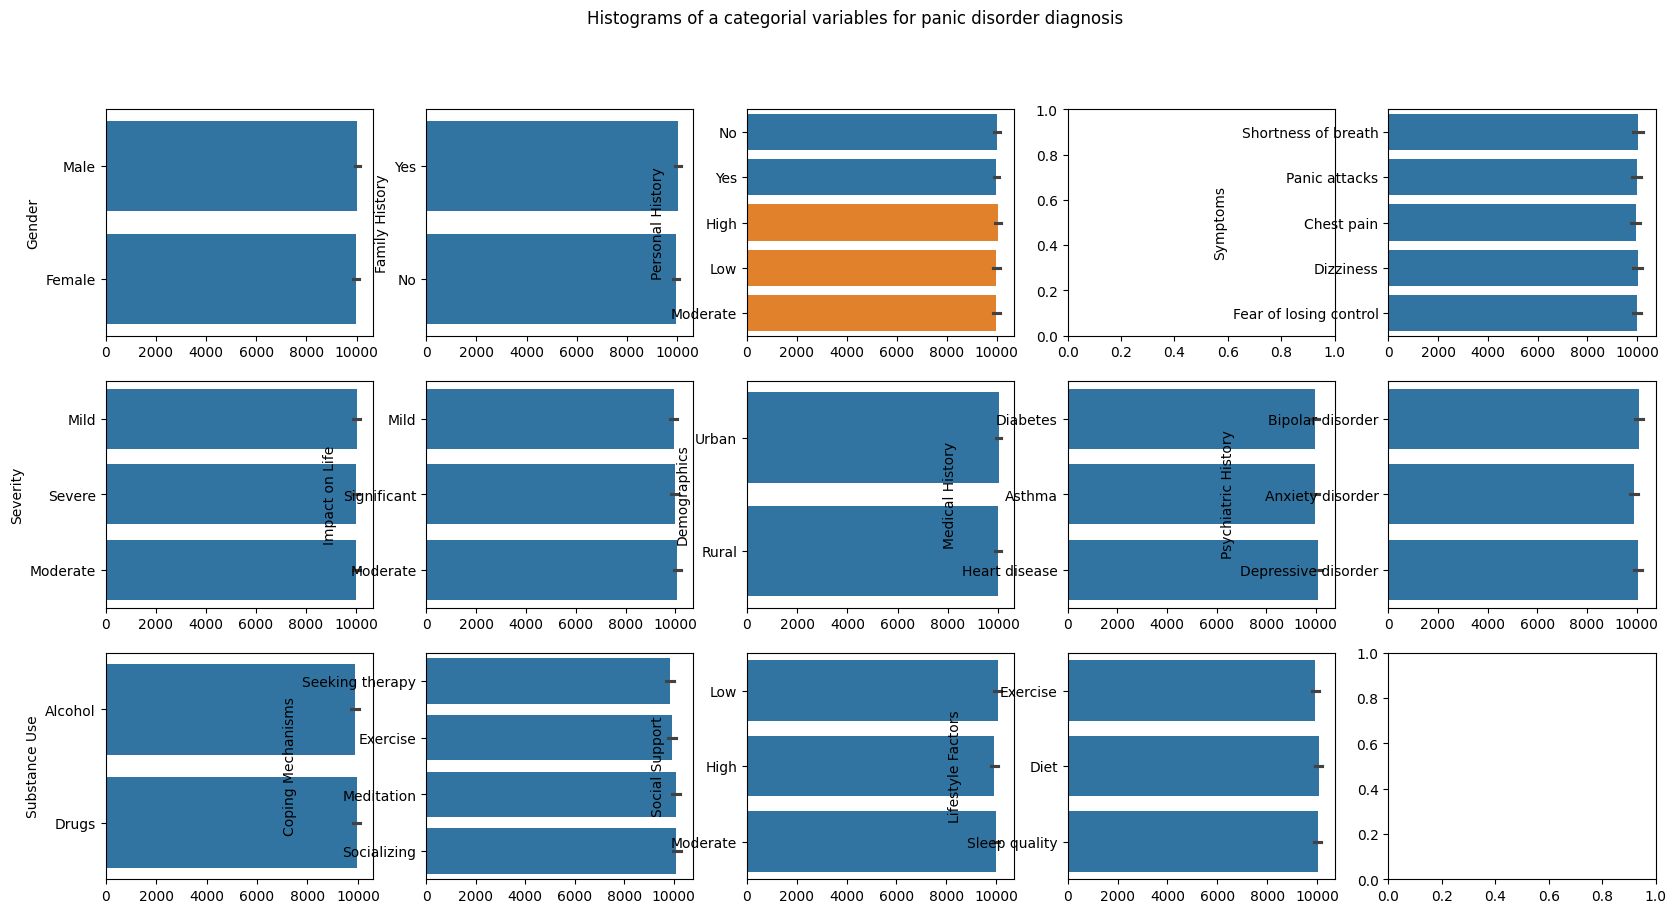

In [22]:
#Bivariate Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(3,5,figsize=(20,10))
fig.suptitle("Histograms of a categorial variables for panic disorder diagnosis")
sns.barplot(df['Gender'],ax=axes[0,0])
sns.barplot(df['Family History'],ax=axes[0,1])
sns.barplot(df['Personal History'],ax=axes[0,2])
sns.barplot(df['Current Stressors'],ax=axes[0,2])
sns.barplot(df['Symptoms'],ax=axes[0,4])
sns.barplot(df['Severity'],ax=axes[1,0])
sns.barplot(df['Impact on Life'],ax=axes[1,1])
sns.barplot(df['Demographics'],ax=axes[1,2])
sns.barplot(df['Medical History'],ax=axes[1,3])
sns.barplot(df['Psychiatric History'],ax=axes[1,4])
sns.barplot(df['Substance Use'],ax=axes[2,0])
sns.barplot(df['Coping Mechanisms'],ax=axes[2,1])
sns.barplot(df['Social Support'],ax=axes[2,2])
sns.barplot(df['Lifestyle Factors'],ax=axes[2,3])

In [23]:
x_train,y_train = train.iloc[:, 1:-1],train.iloc[:,-1:]
x_test,y_test = test.iloc[:, 1:-1], test.iloc[:,-1:]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(12548, 15) (12548, 1)
(7563, 15) (7563, 1)


In [24]:
#Writing function to train the model
def train_model_eval(temp_x,temp_y,fts):
    print("RANDOM FOREST")
    rf = RandomForestClassifier(random_state=1234)
    rf.fit(temp_x[fts],temp_y)
    y_pred=rf.predict(x_test[fts])
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("SCORE:",rf.score(x_test[fts],y_test))

    print("\n--->DECISION TREE")
    dtf = DecisionTreeClassifier(random_state=1234)
    dtf.fit(temp_x[fts], temp_y)
    y_pred=dtf.predict(x_test[fts])
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("SCORE:",dtf.score(x_test[fts],y_test))

    print("\n--->KNN")
    knn = KNeighborsClassifier()
    knn.fit(temp_x[fts], temp_y)
    y_pred = knn.predict(x_test[fts])
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("SCORE:",knn.score(x_test[fts],y_test))

    print("\n--->EXTRAS TREES CLASSIFIER")
    etc=ExtraTreesClassifier(random_state=1234)
    etc.fit(temp_x[fts], temp_y)
    y_pred = etc.predict(x_test[fts])
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("SCORE:",etc.score(x_test[fts],y_test))

    print("\n--->XGBOOST")
    xgb = xgboost.XGBClassifier()
    xgb.fit(temp_x[fts],temp_y)
    y_pred = xgb.predict(x_test[fts])
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("SCORE:", xgb.score(x_test[fts], y_test))  # Correctly using the trained xgb classifier


    return rf,dtf,knn,etc,xgb

In [25]:
#Calling the function
from sklearn.metrics import classification_report
#print("SCORE:", xgboost.XGBClassifier().score(x_test[fts], y_test))

# Call the function to train the model and get the trained classifier
rf,dtf,knn,etc,xgb = train_model_eval(temp_x, temp_y, fts)



# Generate predictions on the test set
y_pred = rf.predict(x_test[fts])

# Evaluate performance on the test set (using y_test, not y_train)
print(classification_report(y_test, y_pred)) # Use y_test for evaluation

RANDOM FOREST
[[5040 2144]
 [ 209  170]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.81      7184
           1       0.07      0.45      0.13       379

    accuracy                           0.69      7563
   macro avg       0.52      0.58      0.47      7563
weighted avg       0.92      0.69      0.78      7563

SCORE: 0.6888800740446913

--->DECISION TREE
[[5396 1788]
 [ 226  153]]
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      7184
           1       0.08      0.40      0.13       379

    accuracy                           0.73      7563
   macro avg       0.52      0.58      0.49      7563
weighted avg       0.92      0.73      0.81      7563

SCORE: 0.7337035567896337

--->KNN
[[5491 1693]
 [ 238  141]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7184
           1       0.08      0.37      0.13       379

    acc

In [26]:
#testing the model
knn.predict([temp_x[fts].iloc[60,:]])

array([0.])

In [27]:
# Assuming 'y_test' contains the target labels
print(y_test.value_counts())

Panic Disorder Diagnosis
0                           7184
1                            379
Name: count, dtype: int64


In [28]:
y_test['Panic Disorder Diagnosis'][60]

0

In [29]:
#compare the model
from sklearn.metrics import classification_report
#print("SCORE:", xgboost.XGBClassifier().score(x_test[fts], y_test))

# Call the function to train the model and get the trained classifier
rf,dtf,knn,etc,xgb = train_model_eval(temp_x, temp_y, fts)



# Generate predictions on the test set
y_pred = rf.predict(x_test[fts])

# Evaluate performance on the test set (using y_test, not y_train)
print(classification_report(y_test, y_pred)) # Use y_test for evaluation

RANDOM FOREST
[[5040 2144]
 [ 209  170]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.81      7184
           1       0.07      0.45      0.13       379

    accuracy                           0.69      7563
   macro avg       0.52      0.58      0.47      7563
weighted avg       0.92      0.69      0.78      7563

SCORE: 0.6888800740446913

--->DECISION TREE
[[5396 1788]
 [ 226  153]]
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      7184
           1       0.08      0.40      0.13       379

    accuracy                           0.73      7563
   macro avg       0.52      0.58      0.49      7563
weighted avg       0.92      0.73      0.81      7563

SCORE: 0.7337035567896337

--->KNN
[[5491 1693]
 [ 238  141]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7184
           1       0.08      0.37      0.13       379

    acc

In [30]:
#Comparing model Accuracy before and after applying hyperparameter Tuning
dtf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt', 'log2'] # Remove space in 'max_features'
}

#Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=1234)

#Create GridSearchCV object
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, verbose = 1, n_jobs=-1)

# Fit the data to perfore grid search
grid_search.fit(temp_x[fts], temp_y)

#Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score",grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Score 0.7750602928509905


In [32]:
y_pred-grid_search.best_estimator_.predict(x_test[fts])
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("SCORE:",grid_search.best_estimator_.score(x_test[fts],y_test))

[[5040 2144]
 [ 209  170]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.81      7184
           1       0.07      0.45      0.13       379

    accuracy                           0.69      7563
   macro avg       0.52      0.58      0.47      7563
weighted avg       0.92      0.69      0.78      7563

SCORE: 0.6724844638371017


In [33]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2'] # Remove space in 'max_features'
}

#Create a Decision Tree classifier
rf_classifier = RandomForestClassifier(random_state=1234)

#Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, verbose = 1, n_jobs=-1)

# Fit the data to perfore grid search
grid_search.fit(temp_x[fts], temp_y)

#Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score",grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Score 0.7973772609819122


In [35]:
y_pred-grid_search.best_estimator_.predict(x_test[fts])
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("SCORE:",grid_search.best_estimator_.score(x_test[fts],y_test))

[[5040 2144]
 [ 209  170]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.81      7184
           1       0.07      0.45      0.13       379

    accuracy                           0.69      7563
   macro avg       0.52      0.58      0.47      7563
weighted avg       0.92      0.69      0.78      7563

SCORE: 0.6698400105778131


In [36]:
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [37]:
params = {
        'min_child_weight': [10,20],
        'garma': [0,1.5,2.0],
        'colsample_bytree': [8.6, 0.8, 8.9],
        'max_depth': [4,5,6]
        }
xgb = xgboost.XGBClassifier(learning_rate=0.5, n_estimators=100, objective = 'binary:logistic', nthread=3)
fitmodel = GridSearchCV(xgb, param_grid=params, cv=5, refit=True, scoring='accuracy', n_jobs=-1, verbose=3)
fitmodel.fit(temp_x[fts], temp_y)
#Print the best parameters and best score
print("Best Parameters:", fitmodel.best_params_)
print("Best Score:", fitmodel.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'colsample_bytree': 0.8, 'garma': 0, 'max_depth': 4, 'min_child_weight': 10}
Best Score: 0.7760034453057708


In [38]:
y_pred=fitmodel.best_estimator_.predict(x_test[fts])
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("SCORE:",fitmodel.best_estimator_.score(x_test[fts],y_test))

[[4961 2223]
 [ 216  163]]
              precision    recall  f1-score   support

           0       0.96      0.69      0.80      7184
           1       0.07      0.43      0.12       379

    accuracy                           0.68      7563
   macro avg       0.51      0.56      0.46      7563
weighted avg       0.91      0.68      0.77      7563

SCORE: 0.6775089250297501


In [39]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [40]:
param_grid= {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}
#Create the Random ForestClassifier
knn = KNeighborsClassifier()

#Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=1, n_jobs=4)

# Fit the GridSearchCV to your data
grid_search.fit(temp_x[fts], temp_y)

#Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters:  {'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Best Score: 0.7499526270456504


In [41]:
y_pred-grid_search.best_estimator_.predict(x_test[fts])
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("SCORE:",grid_search.best_estimator_.score(x_test[fts],y_test))

[[4961 2223]
 [ 216  163]]
              precision    recall  f1-score   support

           0       0.96      0.69      0.80      7184
           1       0.07      0.43      0.12       379

    accuracy                           0.68      7563
   macro avg       0.51      0.56      0.46      7563
weighted avg       0.91      0.68      0.77      7563

SCORE: 0.6472299352108951


In [42]:
knn = KNeighborsClassifier(algorithm ='brute', leaf_size = 20, n_neighbors=6, p = 1, weights = 'distance')
knn.fit(temp_x[fts],temp_y)
y_pred=knn.predict(x_test[fts])
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("SCORE:",knn.score(x_test[fts],y_test))

[[5226 1958]
 [ 221  158]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      7184
           1       0.07      0.42      0.13       379

    accuracy                           0.71      7563
   macro avg       0.52      0.57      0.48      7563
weighted avg       0.92      0.71      0.79      7563

SCORE: 0.7118868174005024


In [43]:
pkl.dump(knn,open('knn.pkl','wb'))